## (1) 문제 정의

- 주택 가격 데이터를 이용하여 주택 가격을 예측 해보자!!
- 데이터 전처리, EDA 과정을 활용한다
- 머신러닝 전 과정을 이해하고 활용한다

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.pyplot as plt
import seaborn as sns

# 목록을 볼 때 생략없이 다 보이게 함
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

## (2) 데이터 수집

In [2]:
# 데이터 불러오기
train1 = pd.read_csv("train.csv", index_col='Id')
train = train1
test = pd.read_csv("test.csv", index_col='Id')

In [3]:
train.head()
# SalePrice -> y값

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,20,RL,NaN,21695,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,9,1988,2007,Hip,CompShg,Wd Sdng,Plywood,BrkFace,260.0,Gd,Gd,CBlock,Gd,TA,No,GLQ,808.0,Unf,0.0,72.0,880.0,GasA,Ex,Y,SBrkr,1680,0,0,1680,1.0,0.0,2,0,3,1,Gd,5,Typ,1,Gd,Attchd,1988.0,Fin,2.0,540.0,TA,TA,Y,292,44,0,182,0,0,NaN,NaN,NaN,0,12,2009,WD,Normal,222000.000000
2,20,RL,NaN,10530,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1971,1971,Hip,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,282.0,LwQ,35.0,664.0,981.0,GasA,TA,Y,SBrkr,981,0,0,981,1.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,Detchd,1979.0,Unf,2.0,576.0,TA,TA,Y,0,312,40,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Normal,143250.000000
3,20,RL,88.0,12803,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,99.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,922.0,Unf,0.0,572.0,1494.0,GasA,Ex,Y,SBrkr,1494,0,0,1494,1.0,0.0,2,0,3,1,Gd,6,Typ,1,TA,Attchd,2002.0,RFn,2.0,530.0,TA,TA,Y,192,36,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,221000.000000
4,60,FV,114.0,8314,Pave,Pave,IR1,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,1997,1998,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,569.0,569.0,GasA,Ex,Y,SBrkr,854,840,0,1694,0.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,BuiltIn,1997.0,Unf,1.0,434.0,TA,TA,Y,0,382,0,0,110,0,NaN,GdPrv,NaN,0,11,2006,WD,Normal,190269.599579
5,20,RL,78.0,10335,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1968,1993,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,570.0,Unf,0.0,891.0,1461.0,GasA,Gd,Y,SBrkr,1721,0,0,1721,0.0,0.0,2,1,3,1,TA,7,Min1,1,TA,Attchd,1968.0,RFn,2.0,440.0,TA,TA,Y,0,96,180,0,0,0,NaN,MnPrv,NaN,0,7,2006,WD,Normal,180000.000000


In [4]:
train.shape

(1751, 80)

In [5]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1752,20,RL,78.0,10206,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,PosN,Norm,1Fam,1Story,8,5,2008,2008,Gable,CompShg,VinylSd,VinylSd,BrkFace,294.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1614.0,1614.0,GasA,Ex,Y,SBrkr,1658,0,0,1658,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2008.0,Fin,3.0,726.0,TA,TA,Y,144,44,0,0,0,0,NaN,NaN,NaN,0,9,2009,WD,Normal
1753,50,RL,50.0,5000,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,SWISU,Norm,Norm,1Fam,1.5Fin,5,6,1924,1950,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,LwQ,218.0,Unf,0.0,808.0,1026.0,GasA,TA,Y,SBrkr,1026,665,0,1691,0.0,0.0,2,0,3,1,Gd,6,Typ,1,Gd,Detchd,1924.0,Unf,1.0,308.0,TA,TA,Y,0,0,242,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1754,60,RL,NaN,9930,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,199.0,Gd,TA,PConc,Gd,TA,No,GLQ,456.0,Unf,0.0,370.0,826.0,GasA,Ex,Y,SBrkr,878,884,0,1762,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,2002.0,Fin,2.0,591.0,TA,TA,Y,320,54,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal
1755,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862.0,Unf,0.0,255.0,1117.0,GasA,Ex,Y,SBrkr,1127,886,0,2013,1.0,0.0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2.0,455.0,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal
1756,50,RL,66.0,21780,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1.5Fin,6,7,1918,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,Gd,TA,Mn,Unf,0.0,Unf,0.0,1163.0,1163.0,GasA,Ex,Y,SBrkr,1163,511,0,1674,0.0,0.0,2,0,4,1,TA,8,Typ,1,Gd,Detchd,1955.0,Fin,2.0,396.0,TA,TA,N,72,36,0,0,144,0,NaN,NaN,NaN,0,7,2008,WD,Normal


In [6]:
test.shape

(1168, 79)

## (3) 데이터 전처리 및 EDA

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 1 to 1751
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1751 non-null   int64  
 1   MSZoning       1747 non-null   object 
 2   LotFrontage    1450 non-null   float64
 3   LotArea        1751 non-null   int64  
 4   Street         1751 non-null   object 
 5   Alley          125 non-null    object 
 6   LotShape       1751 non-null   object 
 7   LandContour    1751 non-null   object 
 8   Utilities      1750 non-null   object 
 9   LotConfig      1751 non-null   object 
 10  LandSlope      1751 non-null   object 
 11  Neighborhood   1751 non-null   object 
 12  Condition1     1751 non-null   object 
 13  Condition2     1751 non-null   object 
 14  BldgType       1751 non-null   object 
 15  HouseStyle     1751 non-null   object 
 16  OverallQual    1751 non-null   int64  
 17  OverallCond    1751 non-null   int64  
 18  YearBuil

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 1752 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   int64  
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    983 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   Street         1168 non-null   object 
 5   Alley          73 non-null     object 
 6   LotShape       1168 non-null   object 
 7   LandContour    1168 non-null   object 
 8   Utilities      1167 non-null   object 
 9   LotConfig      1168 non-null   object 
 10  LandSlope      1168 non-null   object 
 11  Neighborhood   1168 non-null   object 
 12  Condition1     1168 non-null   object 
 13  Condition2     1168 non-null   object 
 14  BldgType       1168 non-null   object 
 15  HouseStyle     1168 non-null   object 
 16  OverallQual    1168 non-null   int64  
 17  OverallCond    1168 non-null   int64  
 18  YearB

### > 결측치 채우기

- 문자형데이터

In [9]:
train['BsmtQual'].value_counts()

TA    772
Gd    713
Ex    157
Fa     56
Name: BsmtQual, dtype: int64

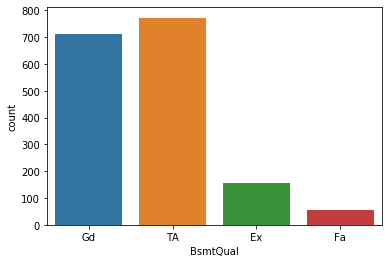

In [10]:
import seaborn as sns

sns.countplot(train['BsmtQual'])

In [11]:
# 훈련데이터

# 없는 값이라 'NA'로 채움
train["FireplaceQu"]= train["FireplaceQu"].fillna("NA") #벽난로가 없는 것들이 결측치로 남은 것

train['MSZoning'] = train['MSZoning'].fillna('RL')

train['MasVnrType'] = train['MasVnrType'].fillna('None')

train["GarageType"]= train["GarageType"].fillna('Attchd')

train["GarageFinish"]= train["GarageFinish"].fillna("Unf")

train['Electrical'] = train['Electrical'].fillna('SBrkr')

train['GarageQual'] = train['GarageQual'].fillna('TA')

train['GarageCond'] = train['GarageCond'].fillna('TA')

train['BsmtQual'] = train['BsmtQual'].fillna('NA')

train['BsmtCond'] = train['BsmtCond'].fillna('NA')

train['BsmtExposure'] = train['BsmtExposure'].fillna('NA')

train['BsmtFinType1'] = train['BsmtFinType1'].fillna('Unf')

train['BsmtFinType2'] = train['BsmtFinType2'].fillna('Unf')

train['Functional'] = train['Functional'].fillna('Typ')

train['Fence'] = train['Fence'].fillna('NA')


In [12]:
# 테스트데이터

test["FireplaceQu"]= test["FireplaceQu"].fillna("NA") #벽난로가 없는 것들이 결측치로 남은 것

test['MasVnrType'] = test['MasVnrType'].fillna('None')

test["GarageType"]= test["GarageType"].fillna('Attchd')

test["GarageFinish"]= test["GarageFinish"].fillna("Unf")

test['GarageQual'] = test['GarageQual'].fillna('TA')

test['GarageCond'] = test['GarageCond'].fillna('TA')

test['BsmtQual'] = test['BsmtQual'].fillna('NA')

test['BsmtCond'] = test['BsmtCond'].fillna('NA')

test['BsmtExposure'] = test['BsmtExposure'].fillna('NA')

test['BsmtFinType1'] = test['BsmtFinType1'].fillna('GLQ')

test['BsmtFinType2'] = test['BsmtFinType2'].fillna('Unf')

test['SaleType'] = test['SaleType'].fillna('WD')

test['KitchenQual'] = test['KitchenQual'].fillna('TA')

test['Exterior1st'] = test['Exterior1st'].fillna('VinySd')

test['Exterior2nd'] = test['Exterior2nd'].fillna('VinySd')

test['Fence'] = test['Fence'].fillna('NA')


- 애매한 수치형

In [13]:
train['LotFrontage'].describe()

count    1450.000000
mean       69.448966
std        24.214659
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

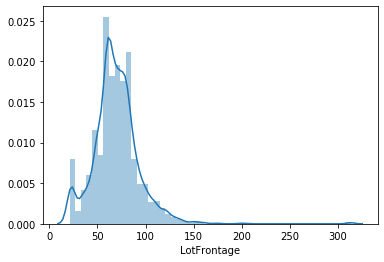

In [14]:
import seaborn as sns

sns.distplot(train['LotFrontage'])

In [15]:
#애매한 수치형

train["BsmtHalfBath"]= train["BsmtHalfBath"].fillna(0.0)

test["BsmtHalfBath"]= test["BsmtHalfBath"].fillna(0.0)

train['BsmtFullBath'] = train['BsmtFullBath'].fillna(0.0)

test['BsmtFullBath'] = test['BsmtFullBath'].fillna(0.0)

train['GarageCars'] = train['GarageCars'].fillna(0.0)


- 수치형
- 1개짜리 데이터들이므로 가장 많은 값에 넣음

In [16]:

train['BsmtFinSF1'] = train['BsmtFinSF1'].fillna(0.0)

train['BsmtFinSF2'] = train['BsmtFinSF2'].fillna(0.0)

train['BsmtUnfSF'] = train['BsmtUnfSF'].fillna(0.0)

train['TotalBsmtSF'] = train['TotalBsmtSF'].fillna(0.0)

train['GarageArea'] = train['GarageArea'].fillna(0.0)


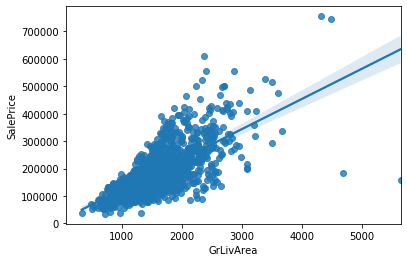

In [17]:
sns.regplot(train['GrLivArea'], train['SalePrice'])

In [18]:
# 이상치로 보이는 데이터 2개를 삭제한다.
train=train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

- 범주화 후 결측치 채우기

In [19]:
def cete_GarageYrBlt(GarageYrBlt) : 
    if GarageYrBlt>1896 and GarageYrBlt < 1930:
        return 0
    elif GarageYrBlt <1940 : 
        return 1
    elif GarageYrBlt <1950 : 
        return 2
    elif GarageYrBlt <1960 : 
        return 3
    elif GarageYrBlt <1970 : 
        return 4
    elif GarageYrBlt <1980 : 
        return 5
    elif GarageYrBlt <1990 : 
        return 6
    elif GarageYrBlt <2000 : 
        return 7
    elif GarageYrBlt <2010 :
        return 8

# 함수 적용
train["GarageYrBlt_cat"] = train["GarageYrBlt"].apply(cete_GarageYrBlt)

test["GarageYrBlt_cat"] = test["GarageYrBlt"].apply(cete_GarageYrBlt)

# 함수 적용 후 원래 데이터 삭제
del train["GarageYrBlt"]
del test["GarageYrBlt"]

# 결측치는 차고가 만들어지지 않았으므로 '0'로 채움

train["GarageYrBlt_cat"]= train["GarageYrBlt_cat"].fillna(0)

test["GarageYrBlt_cat"]= test["GarageYrBlt_cat"].fillna(0)


In [20]:
def cete_LotFrontage(LotFrontage) : 
    if LotFrontage>20 and LotFrontage < 30:
        return 0
    elif LotFrontage <40 :
        return 1
    elif LotFrontage <50 : 
        return 2
    elif LotFrontage <60 : 
        return 3
    elif LotFrontage <70: 
        return 4
    elif LotFrontage <80 : 
        return 5
    elif LotFrontage <90 : 
        return 6
    elif LotFrontage <100 : 
        return 7
    elif LotFrontage <315 :
        return 8

# 함수 적용
train["LotFrontage_cat"] = train["LotFrontage"].apply(cete_LotFrontage)

test["LotFrontage_cat"] = test["LotFrontage"].apply(cete_LotFrontage)

# 함수 적용 후 원래 데이터 삭제
del train["LotFrontage"]
del test["LotFrontage"]

# 가장 많은 값인 '0'로 채움
train["LotFrontage_cat"]= train["LotFrontage_cat"].fillna(0)

test["LotFrontage_cat"]= test["LotFrontage_cat"].fillna(0)


In [21]:
def cete_MasVnrArea(MasVnrArea) : 
    if MasVnrArea == 0:
        return 0
    elif MasVnrArea <100 :
        return 1
    elif MasVnrArea <200 :
        return 2
    elif MasVnrArea <300 :
        return 3
    elif MasVnrArea <400 :
        return 4
    elif MasVnrArea <500 :
        return 5
    elif MasVnrArea <1601 :
        return 6

# 함수 적용
train["MasVnrArea_cat"] = train["MasVnrArea"].apply(cete_MasVnrArea)

test["MasVnrArea_cat"] = test["MasVnrArea"].apply(cete_MasVnrArea)

# 함수 적용 후 원래 데이터 삭제
del train["MasVnrArea"]
del test["MasVnrArea"]

# MasVnrType과 MasVnrArea의 관계를 보고'0'으로 채움(None -> 0)
train["MasVnrArea_cat"]= train["MasVnrArea_cat"].fillna(0)

test["MasVnrArea_cat"]= test["MasVnrArea_cat"].fillna(0)


- 필요없는 특성 삭제

In [22]:
# 훈련데이터

del train['Alley'] # 결측치가 많음
del train['PoolQC'] # 결측치가 많고 수영장이 없는 경우가 많음
del train['MiscFeature'] #집에 필요없는 테니스코트 엘레베이터 등임
del train['Utilities'] # 데이터가 하나임
del train['Condition2'] #Condition1에서 이미 평가하고 남은 것들 주로 0이 많음
del train['Street'] # 데이터가 하나임
del train['MoSold'] # 판매월은 상관없을듯
del train['YrSold'] # 판매년은 상관없을듯

# 테스트데이터

del test['Alley']
del test['PoolQC']
del test['MiscFeature']
del test['Utilities']
del test['Condition2']
del test['Street']
del test['MoSold']
del test['YrSold']


### > 데이터 확인

- 훈련데이터

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1749 entries, 1 to 1751
Data columns (total 72 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MSSubClass       1749 non-null   int64  
 1   MSZoning         1749 non-null   object 
 2   LotArea          1749 non-null   int64  
 3   LotShape         1749 non-null   object 
 4   LandContour      1749 non-null   object 
 5   LotConfig        1749 non-null   object 
 6   LandSlope        1749 non-null   object 
 7   Neighborhood     1749 non-null   object 
 8   Condition1       1749 non-null   object 
 9   BldgType         1749 non-null   object 
 10  HouseStyle       1749 non-null   object 
 11  OverallQual      1749 non-null   int64  
 12  OverallCond      1749 non-null   int64  
 13  YearBuilt        1749 non-null   int64  
 14  YearRemodAdd     1749 non-null   int64  
 15  RoofStyle        1749 non-null   object 
 16  RoofMatl         1749 non-null   object 
 17  Exterior1st   

In [24]:
train.isnull().sum()

MSSubClass         0
MSZoning           0
LotArea            0
LotShape           0
LandContour        0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd 

In [25]:
train.shape

(1749, 72)

- 테스트데이터

In [26]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 1752 to 2919
Data columns (total 71 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MSSubClass       1168 non-null   int64  
 1   MSZoning         1168 non-null   object 
 2   LotArea          1168 non-null   int64  
 3   LotShape         1168 non-null   object 
 4   LandContour      1168 non-null   object 
 5   LotConfig        1168 non-null   object 
 6   LandSlope        1168 non-null   object 
 7   Neighborhood     1168 non-null   object 
 8   Condition1       1168 non-null   object 
 9   BldgType         1168 non-null   object 
 10  HouseStyle       1168 non-null   object 
 11  OverallQual      1168 non-null   int64  
 12  OverallCond      1168 non-null   int64  
 13  YearBuilt        1168 non-null   int64  
 14  YearRemodAdd     1168 non-null   int64  
 15  RoofStyle        1168 non-null   object 
 16  RoofMatl         1168 non-null   object 
 17  Exterior1st

In [27]:
test.isnull().sum()

MSSubClass         0
MSZoning           0
LotArea            0
LotShape           0
LandContour        0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
KitchenQual        0
TotRmsAbvGrd 

In [28]:
test.shape

(1168, 71)

## (3) 데이터 전처리 및 EDA

In [29]:
# 범주형으로 보이므로 문자형으로 변환한다.
train['MSSubClass'] = train['MSSubClass'].astype(str)
test['MSSubClass'] = test['MSSubClass'].astype(str)

- 데이터 합치기
- 작은 개수인 데이터들을 합쳐 새로운 변수 com으로 저장한다.

- 훈련 데이터

In [30]:

train.loc[train['MSZoning'] == 'C (all)', 'MSZoning'] = "RL"
train.loc[train['MSZoning'] == 'RH', 'MSZoning'] = "RL"

train.loc[train['LotShape'] == 'IR3', 'LotShape'] = "Reg"

train.loc[train['LotConfig'] == 'FR3', 'LotConfig'] = "Inside"

train.loc[train['LandSlope'] == 'Sev', 'LandSlope'] = "Gtl"

train.loc[train['Neighborhood'] == 'Blueste', 'Neighborhood'] = "NAmes"
train.loc[train['Neighborhood'] == 'Veenker', 'Neighborhood'] = "NAmes"
train.loc[train['Neighborhood'] == 'Blmngtn', 'Neighborhood'] = "NAmes"
train.loc[train['Neighborhood'] == 'NPkVill', 'Neighborhood'] = "NAmes"
train.loc[train['Neighborhood'] == 'BrDale', 'Neighborhood'] = "NAmes"

train.loc[train['Condition1'] == 'RRNn', 'Condition1'] = "Norm"
train.loc[train['Condition1'] == 'RRNe', 'Condition1'] = "Norm"

train.loc[train['HouseStyle'] == '2.5Fin', 'HouseStyle'] = "1Story"
train.loc[train['HouseStyle'] == '2.5Unf', 'HouseStyle'] = "1Story"
train.loc[train['HouseStyle'] == '1.5Unf', 'HouseStyle'] = "1Story"

train.loc[train['RoofStyle'] == 'Gambrel','RoofStyle' ] = 'Gable'
train.loc[train['RoofStyle'] == 'Flat','RoofStyle'] = 'Gable'
train.loc[train['RoofStyle'] == 'Mansard','RoofStyle'] = 'Gable'
train.loc[train['RoofStyle'] == 'Shed','RoofStyle'] = 'Gable'

train.loc[train['RoofMatl'] == 'WdShake','RoofMatl'] = 'com'
train.loc[train['RoofMatl'] == 'WdShngl','RoofMatl'] = 'com'
train.loc[train['RoofMatl'] == 'Metal','RoofMatl'] = 'com'
train.loc[train['RoofMatl'] == 'Roll','RoofMatl'] = 'com'
train.loc[train['RoofMatl'] == 'ClyTile','RoofMatl'] = 'com'
train.loc[train['RoofMatl'] == 'Tar&Grv','RoofMatl'] = 'com'

train.loc[train['Exterior1st'] == 'BrkComm','Exterior1st'] = 'VinylSd'
train.loc[train['Exterior1st'] == 'Stone','Exterior1st'] = 'VinylSd'
train.loc[train['Exterior1st'] == 'CBlock','Exterior1st'] = 'VinylSd'
train.loc[train['Exterior1st'] == 'AsphShn','Exterior1st'] = 'VinylSd'

train.loc[train['Exterior2nd'] == 'Other', 'Exterior2nd'] = 'VinylSd'
train.loc[train['Exterior2nd'] == 'AsphShn', 'Exterior2nd'] = 'VinylSd'
train.loc[train['Exterior2nd'] == 'CBlock', 'Exterior2nd'] = 'VinylSd'
train.loc[train['Exterior2nd'] == 'Stone', 'Exterior2nd'] = 'VinylSd'
train.loc[train['Exterior2nd'] == 'ImStucc', 'Exterior2nd'] = 'VinylSd'
train.loc[train['Exterior2nd'] == 'Brk Cmn', 'Exterior2nd'] = 'VinylSd'

train.loc[train['Foundation'] == 'Wood', 'Foundation'] = 'PConc'
train.loc[train['Foundation'] == 'Stone', 'Foundation'] = 'PConc'

train.loc[train['Heating'] == 'Floor', 'Heating'] = "com"
train.loc[train['Heating'] == 'OthW', 'Heating'] = "com"
train.loc[train['Heating'] == 'Wall', 'Heating'] = "com"
train.loc[train['Heating'] == 'Grav', 'Heating'] = "com"
train.loc[train['Heating'] == 'GasW', 'Heating'] = "com"

train.loc[train['Electrical'] == 'Mix', 'Electrical'] = "SBrkr"
train.loc[train['Electrical'] == 'FuseP', 'Electrical'] = "SBrkr"

train.loc[train['Functional'] == 'Min2', 'Functional'] = "com"
train.loc[train['Functional'] == 'Min1', 'Functional'] = "com"
train.loc[train['Functional'] == 'Maj1', 'Functional'] = "com"
train.loc[train['Functional'] == 'Mod', 'Functional'] = "com"
train.loc[train['Functional'] == 'Maj2', 'Functional'] = "com"
train.loc[train['Functional'] == 'Sev', 'Functional'] = "com"

train.loc[train['GarageType'] == 'CarPort', 'GarageType'] = "Attchd"
train.loc[train['GarageType'] == '2Types', 'GarageType'] = "Attchd"
train.loc[train['GarageType'] == 'Basment', 'GarageType'] = "Attchd"

train.loc[train['Fence'] == 'MnWw', 'Fence'] = "com"
train.loc[train['Fence'] == 'MnPrv', 'Fence'] = "com"
train.loc[train['Fence'] == 'GdPrv', 'Fence'] = "com"
train.loc[train['Fence'] == 'GdWo', 'Fence'] = "com"

train.loc[train['SaleType'] == 'Con', 'SaleType'] = "com"
train.loc[train['SaleType'] == 'Oth', 'SaleType'] = "com"
train.loc[train['SaleType'] == 'ConLw', 'SaleType'] = "com"
train.loc[train['SaleType'] == 'CWD', 'SaleType'] = "com"
train.loc[train['SaleType'] == 'ConLI', 'SaleType'] = "com"
train.loc[train['SaleType'] == 'ConLD', 'SaleType'] = "com"
train.loc[train['SaleType'] == 'COD', 'SaleType'] = "com"

train.loc[train['SaleCondition'] == 'AdjLand', 'SaleCondition'] = "com"
train.loc[train['SaleCondition'] == 'Alloca', 'SaleCondition'] = "com"
train.loc[train['SaleCondition'] == 'Family', 'SaleCondition'] = "com"


- 테스트데이터

In [31]:

test.loc[test['MSZoning'] == 'C (all)', 'MSZoning'] = "RL"
test.loc[test['MSZoning'] == 'RH', 'MSZoning'] = "RL"

test.loc[test['LotShape'] == 'IR3', 'LotShape'] = "Reg"

test.loc[test['LotConfig'] == 'FR3', 'LotConfig'] = "Inside"

test.loc[test['LandSlope'] == 'Sev', 'LandSlope'] = "Gtl"

test.loc[test['Neighborhood'] == 'Blueste', 'Neighborhood'] = "NAmes"
test.loc[test['Neighborhood'] == 'Veenker', 'Neighborhood'] = "NAmes"
test.loc[test['Neighborhood'] == 'Blmngtn', 'Neighborhood'] = "NAmes"
test.loc[test['Neighborhood'] == 'NPkVill', 'Neighborhood'] = "NAmes"
test.loc[test['Neighborhood'] == 'BrDale', 'Neighborhood'] = "NAmes"

test.loc[test['Condition1'] == 'RRNn', 'Condition1'] = "Norm"
test.loc[test['Condition1'] == 'RRNe', 'Condition1'] = "Norm"

test.loc[test['HouseStyle'] == '2.5Fin', 'HouseStyle'] = "1Story"
test.loc[test['HouseStyle'] == '2.5Unf', 'HouseStyle'] = "1Story"
test.loc[test['HouseStyle'] == '1.5Unf', 'HouseStyle'] = "1Story"

test.loc[test['RoofStyle'] == 'Gambrel','RoofStyle' ] = 'Gable'
test.loc[test['RoofStyle'] == 'Flat','RoofStyle'] = 'Gable'
test.loc[test['RoofStyle'] == 'Mansard','RoofStyle'] = 'Gable'
test.loc[test['RoofStyle'] == 'Shed','RoofStyle'] = 'Gable'

test.loc[test['RoofMatl'] == 'WdShake','RoofMatl'] = 'com'
test.loc[test['RoofMatl'] == 'WdShngl','RoofMatl'] = 'com'
test.loc[test['RoofMatl'] == 'Membran','RoofMatl'] = 'com'
test.loc[test['RoofMatl'] == 'Tar&Grv','RoofMatl'] = 'com'

test.loc[test['Exterior1st'] == 'BrkComm','Exterior1st'] = 'VinylSd'
test.loc[test['Exterior1st'] == 'ImStucc','Exterior1st'] = 'VinylSd'
test.loc[test['Exterior1st'] == 'AsphShn','Exterior1st'] = 'VinylSd'
test.loc[test['Exterior1st'] == 'VinySd','Exterior1st'] = 'VinylSd'

test.loc[test['Exterior2nd'] == 'Stone', 'Exterior2nd'] = 'VinylSd'
test.loc[test['Exterior2nd'] == 'AsphShn', 'Exterior2nd'] = 'VinylSd'
test.loc[test['Exterior2nd'] == 'ImStucc', 'Exterior2nd'] = 'VinylSd'
test.loc[test['Exterior2nd'] == 'Brk Cmn', 'Exterior2nd'] = 'VinylSd'
test.loc[test['Exterior2nd'] == 'VinySd', 'Exterior2nd'] = 'VinylSd'

test.loc[test['Foundation'] == 'Wood', 'Foundation'] = 'PConc'
test.loc[test['Foundation'] == 'Stone', 'Foundation'] = 'PConc'

test.loc[test['Heating'] == 'Wall', 'Heating'] = "com"
test.loc[test['Heating'] == 'GasW', 'Heating'] = "com"
test.loc[test['Heating'] == 'Grav', 'Heating'] = "com"

test.loc[test['Electrical'] == 'FuseP', 'Electrical'] = "SBrkr"

test.loc[test['Functional'] == 'Min2', 'Functional'] = "com"
test.loc[test['Functional'] == 'Min1', 'Functional'] = "com"
test.loc[test['Functional'] == 'Maj1', 'Functional'] = "com"
test.loc[test['Functional'] == 'Mod', 'Functional'] = "com"
test.loc[test['Functional'] == 'Maj2', 'Functional'] = "com"

test.loc[test['GarageType'] == 'CarPort', 'GarageType'] = "Attchd"
test.loc[test['GarageType'] == '2Types', 'GarageType'] = "Attchd"
test.loc[test['GarageType'] == 'Basment', 'GarageType'] = "Attchd"

test.loc[test['Fence'] == 'MnWw', 'Fence'] = "com"
test.loc[test['Fence'] == 'MnPrv', 'Fence'] = "com"
test.loc[test['Fence'] == 'GdPrv', 'Fence'] = "com"
test.loc[test['Fence'] == 'GdWo', 'Fence'] = "com"

test.loc[test['SaleType'] == 'ConLI', 'SaleType'] = "com"
test.loc[test['SaleType'] == 'ConLw', 'SaleType'] = "com"
test.loc[test['SaleType'] == 'Con', 'SaleType'] = "com"
test.loc[test['SaleType'] == 'Oth', 'SaleType'] = "com"
test.loc[test['SaleType'] == 'CWD', 'SaleType'] = "com"
test.loc[test['SaleType'] == 'ConLD', 'SaleType'] = "com"
test.loc[test['SaleType'] == 'COD', 'SaleType'] = "com"

test.loc[test['SaleCondition'] == 'Family', 'SaleCondition'] = "com"
test.loc[test['SaleCondition'] == 'Alloca', 'SaleCondition'] = "com"
test.loc[test['SaleCondition'] == 'AdjLand', 'SaleCondition'] = "com"


### > 매핑
- 문자형데이터 -> 수치형데이터

- 훈련데이터

In [32]:

train['LotShape'] = train['LotShape'].map({'Reg':1, 'IR1':2, 'IR2':3})

train['LotConfig'] = train['LotConfig'].map({'Inside':1, 'Corner':2, 'CulDSac':3, 'FR2':4})

train['HouseStyle'] = train['HouseStyle'].map({'1Story': 3, '2Story': 5, '1.5Fin': 4,  'SLvl': 1, 'SFoyer': 2})

train['ExterQual'] = train['ExterQual'].map({'NA': 0, 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

train['ExterCond'] = train['ExterCond'].map({'NA': 0, 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

train['BsmtQual'] = train['BsmtQual'].map({'NA': 0, 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

train['BsmtCond'] = train['BsmtCond'].map({'NA': 0, 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

train['BsmtExposure'] = train['BsmtExposure'].map({'NA': 0, 'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1})

train['BsmtFinType1'] = train['BsmtFinType1'].map({'NA': 0, 'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1})

train['BsmtFinType2'] = train['BsmtFinType2'].map({'NA': 0, 'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1})

train['HeatingQC'] = train['HeatingQC'].map({'NA': 0, 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

train['CentralAir'] = train['CentralAir'].map({'N': 0, 'Y': 1})

train['KitchenQual'] = train['KitchenQual'].map({'NA': 0, 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

train['FireplaceQu'] = train['FireplaceQu'].map({'NA': 0, 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

train['GarageType'] = train['GarageType'].map({'Attchd': 1, 'Detchd':2, 'BuiltIn':3})

train['GarageFinish'] = train['GarageFinish'].map({'NA': 0, 'Unf': 1, 'RFn':2, 'Fin':3})

train['GarageQual'] = train['GarageQual'].map({'NA': 0, 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

train['GarageCond'] = train['GarageCond'].map({'NA': 0, 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

train['Fence'] = train['Fence'].map({'NA': 0, 'com': 1})

train['SaleType'] = train['SaleType'].map({'WD': 1, 'New': 2, 'com': 3})

train['SaleCondition'] = train['SaleCondition'].map({'Normal': 1, 'Partial': 2, 'Abnorml': 3,'com': 4})


- 테스트데이터

In [33]:

test['LotShape'] = test['LotShape'].map({'Reg':1, 'IR1':2, 'IR2':3})

test['LotConfig'] = test['LotConfig'].map({'Inside':1, 'Corner':2, 'CulDSac':3, 'FR2':4})

test['HouseStyle'] = test['HouseStyle'].map({'1Story': 3, '2Story': 5, '1.5Fin': 4, 'SLvl': 1, 'SFoyer': 2})

test['ExterQual'] = test['ExterQual'].map({'NA': 0, 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

test['ExterCond'] = test['ExterCond'].map({'NA': 0, 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

test['BsmtQual'] = test['BsmtQual'].map({'NA': 0, 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

test['BsmtCond'] = test['BsmtCond'].map({'NA': 0, 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

test['BsmtExposure'] = test['BsmtExposure'].map({'NA': 0, 'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1})

test['BsmtFinType1'] = test['BsmtFinType1'].map({'NA': 0, 'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1})

test['BsmtFinType2'] = test['BsmtFinType2'].map({'NA': 0, 'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1})

test['HeatingQC'] = test['HeatingQC'].map({'NA': 0, 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

test['CentralAir'] = test['CentralAir'].map({'N': 0, 'Y' : 1})

test['KitchenQual'] = test['KitchenQual'].map({'NA': 0, 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

test['FireplaceQu'] = test['FireplaceQu'].map({'NA': 0, 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

test['GarageType'] = test['GarageType'].map({'Attchd': 1, 'Detchd':2, 'BuiltIn':3})

test['GarageFinish'] = test['GarageFinish'].map({'NA': 0, 'Unf': 1, 'RFn':2, 'Fin':3})

test['GarageQual'] = test['GarageQual'].map({'NA': 0, 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

test['GarageCond'] = test['GarageCond'].map({'NA': 0, 'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})

test['Fence'] = test['Fence'].map({'NA': 0, 'com': 1})

test['SaleType'] = test['SaleType'].map({'WD': 1, 'New': 2, 'com': 3})

test['SaleCondition'] = test['SaleCondition'].map({'Normal': 1, 'Partial': 2, 'Abnorml': 3, 'com': 4})


- 새로운 특성 생성
- 관련 있어 보이는 특성들을 이용하여 새로운 특성을 생성

- 훈련데이터

In [34]:
# 집 새것같은 점수
train['YrBltAndRemod'] = train['YearBuilt'] + train['YearRemodAdd']

# 필요없는 특성 삭제
del train['YearBuilt']
del train['YearRemodAdd']

# 지하실 점수. 지하실의 각 성분을 곱함.
Basement = ['BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual',
            'BsmtUnfSF', 'TotalBsmtSF']
Bsmt = train[Basement]

# 점수에 영향을 줄만한 변수들을 곱해놓음
Bsmt['BsmtScore'] = (Bsmt['BsmtQual']  * Bsmt['BsmtCond'] * Bsmt['TotalBsmtSF']) 

train['BsmtScore'] = Bsmt['BsmtScore']

# 시공 마무리 정도와 타입에 따라 가격이 달라짐.
Bsmt['BsmtFin'] = (Bsmt['BsmtFinSF1'] * Bsmt['BsmtFinType1']) + (Bsmt['BsmtFinSF2'] * Bsmt['BsmtFinType2'])
train['BsmtFinScore'] = Bsmt['BsmtFin']

# 시공이 완료 -> 1, 미완 -> 0
train['BsmtDNF'] = (train['BsmtFinScore'] == 0)

# 집의 총 면적.
train['TotalSF']= train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']

# 욕조의 갯수
train['TotalBath'] = train['BsmtFullBath'] + train['FullBath'] + train['BsmtHalfBath']

# 롯트점수
lot = ['LotFrontage_cat', 'LotArea', 'LotConfig', 'LotShape']

# 넓이는 log를 사용해서 정규화
Lot = train[lot]

Lot['LotScore'] = np.log((Lot['LotFrontage_cat'] * Lot['LotArea']) + 1)
train['LotScore'] = Lot['LotScore']

# 차고 점수
garage = ['GarageArea', 'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt_cat']

# 차고의 유무에 따라 있으면 1, 없으면 0
Garage = train[garage]

train['NoGarage'] = (train['GarageArea'] == 0)
                                                                
Garage['GarageScore'] = (Garage['GarageArea'] * Garage['GarageCars'] * Garage['GarageFinish'] 
                         * Garage['GarageQual'] * Garage['GarageType'])
train['GarageScore'] = Garage['GarageScore']
                                                                
# 베란다 크기 점수
ver = ['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']

# 넓이는 log를 사용해서 정규화
veran = train[ver]

veran['VerScore'] = np.log((veran['WoodDeckSF'] + veran['OpenPorchSF'] + veran['EnclosedPorch']
                            + veran['3SsnPorch'] + veran['ScreenPorch']) + 1)

train['VerScore'] = veran['VerScore']
                                                                
train['FireScore'] = train['Fireplaces'] * train['FireplaceQu']
                                                                

C:\Users\Chosun\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Chosun\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Chosun\anaconda3\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

- 테스트데이터

In [35]:
# 집 새것같은 점수
test['YrBltAndRemod'] = test['YearBuilt'] + test['YearRemodAdd']

# 필요없는 특성 삭제
del test['YearBuilt']
del test['YearRemodAdd']

# 지하실 점수. 지하실의 각 성분을 곱함.
Bsmtest = test[Basement]

Bsmtest['BsmtScore'] = (Bsmtest['BsmtQual']  * Bsmtest['BsmtCond'] * Bsmtest['TotalBsmtSF'])
test['BsmtScore'] = Bsmtest['BsmtScore']

Bsmtest['BsmtFin'] = (Bsmtest['BsmtFinSF1'] * Bsmtest['BsmtFinType1']) + (Bsmtest['BsmtFinSF2'] * Bsmtest['BsmtFinType2'])
test['BsmtFinScore'] = Bsmtest['BsmtFin']
test['BsmtDNF'] = (test['BsmtFinScore'] == 0)

# 집의 총 면적
test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']

# 욕조의 갯수
test['TotalBath'] = test['BsmtFullBath'] + test['FullBath'] + (test['BsmtHalfBath'] / 2) + (test['HalfBath'] / 2)

# 롯트점수
lot = ['LotFrontage_cat', 'LotArea', 'LotConfig', 'LotShape']

Lotest = test[lot]
Lotest['LotScore'] = np.log((Lotest['LotFrontage_cat'] * Lotest['LotArea']) + 1)
test['LotScore'] = Lotest['LotScore']

# 차고 점수
garage = ['GarageArea', 'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt_cat']

Garagetest = test[garage]
test['NoGarage'] = (test['GarageArea'] == 0)

Garagetest['GarageScore'] = (Garagetest['GarageArea'] * Garagetest['GarageCars'] * Garagetest['GarageFinish'] * Garagetest['GarageQual'] * Garagetest['GarageType'])
test['GarageScore'] = Garagetest['GarageScore']

# 베란다 크기 점수
ver = ['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']

verant = test[ver]
verant['VerScore'] = np.log((verant['WoodDeckSF'] + verant['OpenPorchSF'] + verant['EnclosedPorch'] + verant['3SsnPorch'] + verant['ScreenPorch']) + 1)

test['VerScore'] = verant['VerScore']

test['FireScore'] = test['Fireplaces'] * test['FireplaceQu']


C:\Users\Chosun\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Chosun\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Chosun\anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

- 데이터 확인

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1749 entries, 1 to 1751
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MSSubClass       1749 non-null   object 
 1   MSZoning         1749 non-null   object 
 2   LotArea          1749 non-null   int64  
 3   LotShape         1749 non-null   int64  
 4   LandContour      1749 non-null   object 
 5   LotConfig        1749 non-null   int64  
 6   LandSlope        1749 non-null   object 
 7   Neighborhood     1749 non-null   object 
 8   Condition1       1749 non-null   object 
 9   BldgType         1749 non-null   object 
 10  HouseStyle       1749 non-null   int64  
 11  OverallQual      1749 non-null   int64  
 12  OverallCond      1749 non-null   int64  
 13  RoofStyle        1749 non-null   object 
 14  RoofMatl         1749 non-null   object 
 15  Exterior1st      1749 non-null   object 
 16  Exterior2nd      1749 non-null   object 
 17  MasVnrType    

In [37]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 1752 to 2919
Data columns (total 80 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MSSubClass       1168 non-null   object 
 1   MSZoning         1168 non-null   object 
 2   LotArea          1168 non-null   int64  
 3   LotShape         1168 non-null   int64  
 4   LandContour      1168 non-null   object 
 5   LotConfig        1168 non-null   int64  
 6   LandSlope        1168 non-null   object 
 7   Neighborhood     1168 non-null   object 
 8   Condition1       1168 non-null   object 
 9   BldgType         1168 non-null   object 
 10  HouseStyle       1168 non-null   int64  
 11  OverallQual      1168 non-null   int64  
 12  OverallCond      1168 non-null   int64  
 13  RoofStyle        1168 non-null   object 
 14  RoofMatl         1168 non-null   object 
 15  Exterior1st      1168 non-null   object 
 16  Exterior2nd      1168 non-null   object 
 17  MasVnrType 

### > 히트맵 출력
- 문자형데이터 + 수치형데이터
- 'SalePrice'와 특성들과의 상관관계를 보여준다.

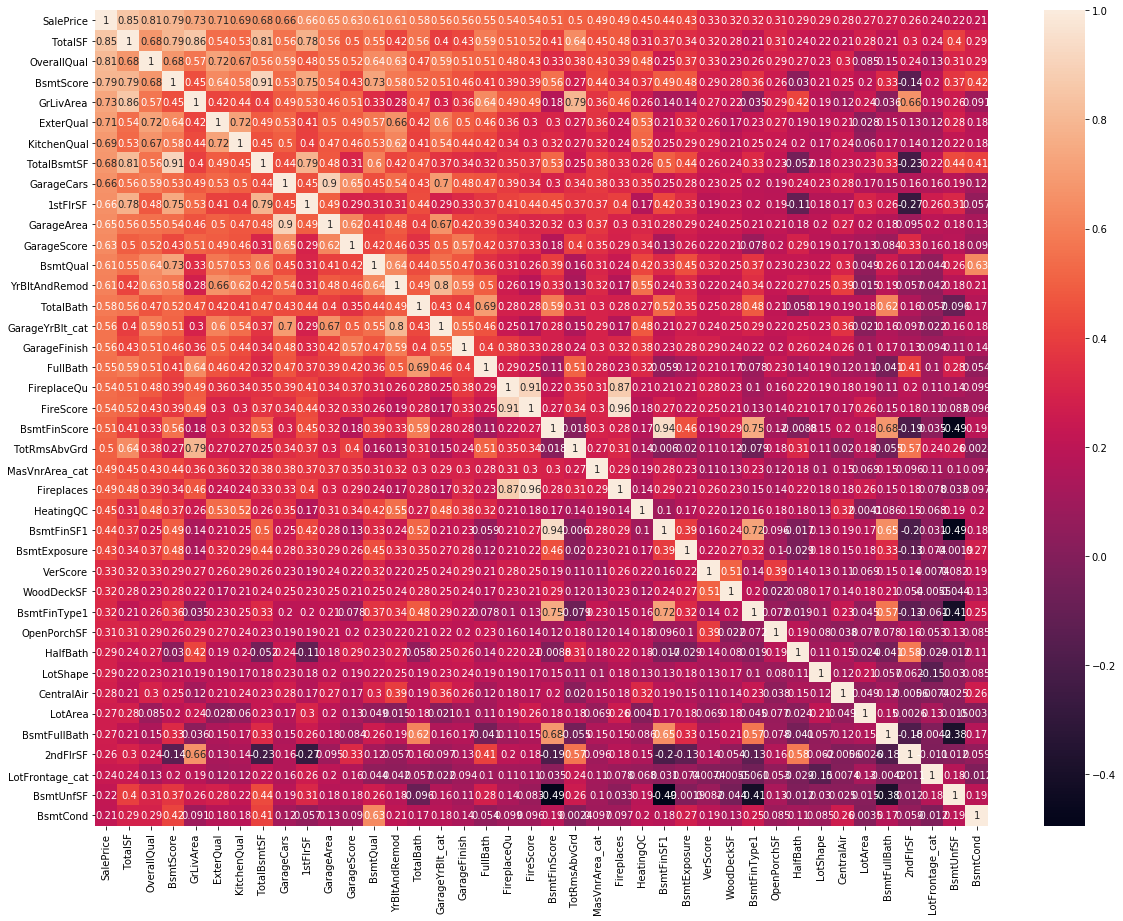

In [38]:
# 특성들과의 상관계수
import seaborn as sns

corr = train.corr()

# SalePrice를 맨 위로 고정한다.
top_corr = train[corr.nlargest(40,'SalePrice')['SalePrice'].index].corr()

figure, ax1 = plt.subplots(nrows = 1, ncols = 1)
figure.set_size_inches(20,15)

# 상관계수를 표시해준다. => annot=True
sns.heatmap(top_corr, annot = True, ax = ax1)

### > 원핫인코딩
> 텍스트와 같은 문자형을 유의미한 숫자(벡터)로 바꾸는 방법

- 훈련데이터

In [39]:
non_numeric = train.select_dtypes(np.object)

def onehot(col_list):
    global train # 다른 세계에서 변수를 가져오겠다(def와 def 외의 세계는 서로 간섭을 할 수가 없으나, def에서 def외 세계의 변수를 사용하고 싶어서 만든것)
    while len(col_list) != 0:
        col = col_list.pop(0)
        data_encoded = pd.get_dummies(train[col], prefix = col)
        train = pd.merge(train, data_encoded, on = 'Id')
        train = train.drop(columns = col)
        
    print(train.shape)
    
onehot(list(non_numeric))

(1749, 163)


- 테스트데이터

In [40]:
no_numeric = test.select_dtypes(np.object)

def twohot(col_list):
    global test # 다른 세계에서 변수를 가져오겠다(def와 def 외의 세계는 서로 간섭을 할 수가 없으나, def에서 def외 세계의 변수를 사용하고 싶어서 만든것)
    while len(col_list) != 0:
        col = col_list.pop(0)
        data_encoded = pd.get_dummies(test[col], prefix = col)
        test = pd.merge(test, data_encoded, on = 'Id')
        test = test.drop(columns = col)
        
    print(test.shape)
    
twohot(list(no_numeric))

(1168, 161)


In [41]:
list(train)

['LotArea',
 'LotShape',
 'LotConfig',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'Fence',
 'MiscVal',
 'SaleType',
 'SaleCondition',
 'SalePrice',
 'GarageYrBlt_cat',
 'LotFrontage_cat',
 'MasVnrArea_cat',
 'YrBltAndRemod',
 'BsmtScore',
 'BsmtFinScore',
 'BsmtDNF',
 'TotalSF',
 'TotalBath',
 'LotScore',
 'NoGarage',
 'GarageScore',
 'VerScore',
 'FireScore',
 'MSSubClass_120',
 'MSSubClass_150',
 

In [42]:
list(test)

['LotArea',
 'LotShape',
 'LotConfig',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'Fence',
 'MiscVal',
 'SaleType',
 'SaleCondition',
 'GarageYrBlt_cat',
 'LotFrontage_cat',
 'MasVnrArea_cat',
 'YrBltAndRemod',
 'BsmtScore',
 'BsmtFinScore',
 'BsmtDNF',
 'TotalSF',
 'TotalBath',
 'LotScore',
 'NoGarage',
 'GarageScore',
 'VerScore',
 'FireScore',
 'MSSubClass_120',
 'MSSubClass_160',
 'MSSubClass_18

In [43]:
# 없는 특성 초기화하여 추가하기
test['MSSubClass_150'] = 0

## (4) 모델 선택 및 학습

In [44]:
# 특성데이터와 라벨데이터 분리
Xtrain = train
Xtrain = Xtrain.drop("SalePrice", axis = 1)

Test = test
y_train = train['SalePrice'].astype("int64")

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xtrain, y_train, random_state = 2)

In [46]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1311, 162), (438, 162), (1311,), (438,))

In [47]:
# 학습할 모델
from sklearn.ensemble import GradientBoostingRegressor

model_GBoost = GradientBoostingRegressor(n_estimators = 1900, learning_rate = 0.06, random_state = 18,
                                         max_depth = 3, max_features = 'sqrt', min_samples_leaf =  2,
                                        min_samples_split = 3, loss = 'huber')

# 훈련모델 생성
model_GBoost.fit(X_train, y_train)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.06, loss='huber',
                          max_depth=3, max_features='sqrt', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=2, min_samples_split=3,
                          min_weight_fraction_leaf=0.0, n_estimators=1900,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=18, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [48]:
# 훈련, 테스트 근사도 출력

print("훈련 근사도 : ", model_GBoost.score(X_train, y_train))
print("테스트 근사도 : ", model_GBoost.score(X_test, y_test))

훈련 근사도 :  0.9947476369136521
테스트 근사도 :  0.9670562785160219


In [49]:
pred_train = model_GBoost.predict(X_train)
pred_test = model_GBoost.predict(X_test)

from sklearn.metrics import mean_squared_error

print(mean_squared_error(pred_train, y_train))
print(mean_squared_error(pred_test, y_test))

31937476.071427137
213631592.41032943


In [50]:
print(np.sqrt(mean_squared_error(pred_train, y_train)))
print(np.sqrt(mean_squared_error(pred_test, y_test)))

5651.325160652777
14616.141502131451


## (5) 평가 / 예측 및 y 값 저장

In [51]:
# 예측모델 생성
pred = model_GBoost.predict(Test)

In [52]:
result = pd.read_csv('sample_submission.csv')

In [53]:
# 예측값을 저장
result['SalePrice'] = pred

In [54]:
result.head()

,Id,SalePrice
0,1752,256623.560509
1,1753,129830.105954
2,1754,201309.474456
3,1755,214591.210652
4,1756,181881.645144


In [55]:
result.to_csv('submission_01.csv', index = False)